In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb
%matplotlib inline

In [2]:
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E"])
G.add_edges_from([("A", "C"), ("B", "A"), ("C", "E"), ("D", "A"), ("E", "A"), ("E","B"), ("E","D")])

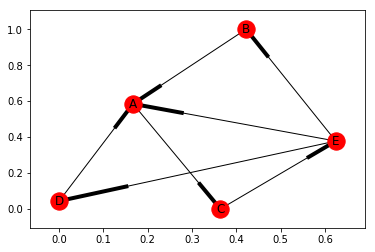

In [3]:
nx.draw_networkx(G)

In [4]:
def pagerank(adj_matrix):
    n = len(adj_matrix)                                        #number of nodes in the graph
    d = 0.9                                                    #dumping factor
    
    #gives coefficients of sending to each node. 
    #Like A has four links out. So all of them would be 1/4
    
    adj_matrix = adj_matrix/(adj_matrix.sum(1).reshape(n,1))
    
    scores = np.ones((1,n))/n #initialize the scores
    dif = 10
    while dif > 1e-8:
        old_scores = scores
        scores = (1-d)/n + d * np.dot(scores, adj_matrix)
        dif = np.absolute(scores - old_scores).sum()
    return scores

In [5]:
adjacency = np.array(nx.adjacency_matrix(G).todense())

In [6]:
pagerank(adjacency)

array([[0.27509387, 0.09824781, 0.26758448, 0.09824781, 0.26082603]])